In [1]:
%pylab inline
import numpy as np
import datetime as dt
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot  as plt

from scipy import stats

from netCDF4 import Dataset

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [42]:
def save(name='', fmt='png'):
    pwd = os.getcwd()
#    iPath = './pictures/{}'.format(fmt)
    iPath = '.'
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

In [14]:
data_path = 'C:\\Users\\23\\anaconda3\\'
file_u60 = data_path + 'jra55.uwnd.60N_mean.5859-2021.djf.wo29feb.nc'

In [5]:
file_u60

'C:/Users/23/OneDrive/Рабочий стол/курсач/jra55.uwnd.60N_mean.5859-2021.djf.wo29feb.nc'

In [15]:
ncin=Dataset(file_u60,'r')
w60_djf_6h=ncin.variables['var33'][:]
#lons=ncin.variables['lon'][:]
#lats=ncin.variables['lat'][:]
#levs=ncin.variables['lev'][:]
time=ncin.variables['time'][:]
ncin.close()

In [16]:
w60_djf_6h.shape

(22680, 1, 1, 1)

In [17]:
u60_djf = np.squeeze(w60_djf_6h)

In [18]:
u60_djf.shape

(22680,)

In [19]:
u60 = np.empty([63, 360])
for i in range (63):
     u60[i, 0:360] = u60_djf[i*360:i*360+360]

In [20]:
u60.shape

(63, 360)

In [50]:
u60_mean = np.mean(u60, axis = 0)
u60_min = np.min(u60, axis = 0)
u60_max = np.max(u60, axis = 0)

In [47]:
u60_min.shape

(360,)

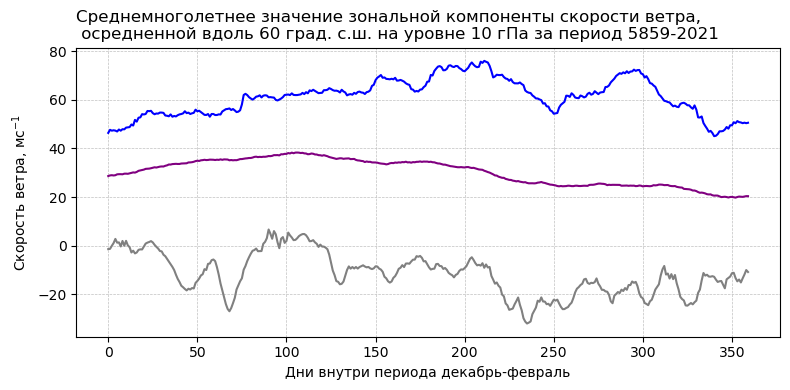

In [51]:
days_u60 = np.asarray([[i] for i in range(0, 360, 1)])
fig1 = plt.figure(figsize = (8, 4), dpi = 100)
ax1=fig1.add_subplot(1,1,1,label='1')
gr1=ax1.plot(days_u60, u60_mean, color='purple')
gr2=ax1.plot(days_u60, u60_min, color='grey')
gr3=ax1.plot(days_u60, u60_max, color='blue')

ax1.set_xlabel("Дни внутри периода декабрь-февраль")
ax1.set_ylabel("Скорость ветра, мс$^{-1}$")
ax1.grid(linewidth='0.5', color='silver',linestyle='dashed')
ax1.set_title('Среднемноголетнее значение зональной компоненты скорости ветра,\n осредненной вдоль 60 град. с.ш. на уровне 10 гПа за период 5859-2021',loc='left')

plt.tight_layout()
plt.savefig(data_path + 'u60_10_mean_5859-2021.png')

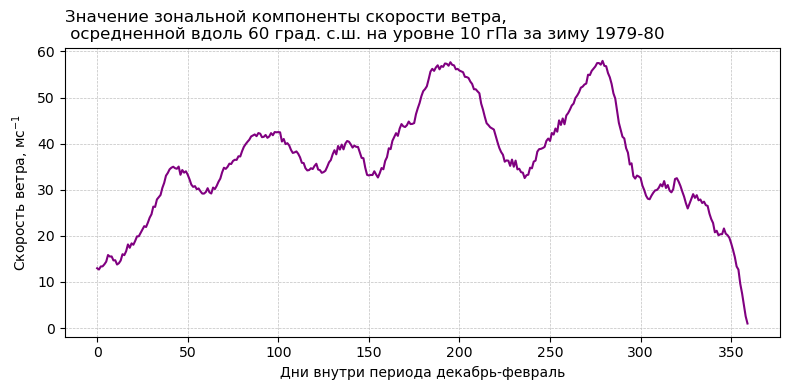

In [53]:
fig1 = plt.figure(figsize = (8, 4), dpi = 100)
ax1=fig1.add_subplot(1,1,1,label='1')
gr1=ax1.plot(days_u60, u60[21,:], color='purple')


ax1.set_xlabel("Дни внутри периода декабрь-февраль")
ax1.set_ylabel("Скорость ветра, мс$^{-1}$")
ax1.grid(linewidth='0.5', color='silver',linestyle='dashed')
ax1.set_title('Значение зональной компоненты скорости ветра,\n осредненной вдоль 60 град. с.ш. на уровне 10 гПа за зиму 1979-80',loc='left')

plt.tight_layout()
plt.savefig(data_path + 'u60_10_example_particular_year.png')

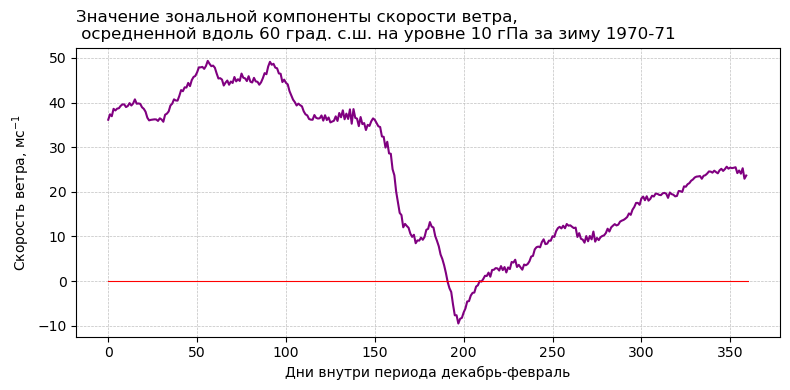

In [60]:
fig1 = plt.figure(figsize = (8, 4), dpi = 100)
ax1=fig1.add_subplot(1,1,1,label='1')
gr1=ax1.plot(days_u60, u60[12,:], color='purple', linewidth = '1.5')
gr1=ax1.plot([0, 360], [0, 0], color='red', linewidth = '0.8')



ax1.set_xlabel("Дни внутри периода декабрь-февраль")
ax1.set_ylabel("Скорость ветра, мс$^{-1}$")
ax1.grid(linewidth='0.5', color='silver',linestyle='dashed')
ax1.set_title('Значение зональной компоненты скорости ветра,\n осредненной вдоль 60 град. с.ш. на уровне 10 гПа за зиму 1970-71',loc='left')

plt.tight_layout()
plt.savefig(data_path + 'u60_10_example_ssw_particular_year.png')

In [67]:
for i in range (63):
    for j in range (360):
        if u60[i, j]<0: 
            print (i, j)
            j = 359

0 7
0 9
1 186
1 187
1 188
1 189
1 190
1 191
1 192
1 193
1 194
1 195
1 196
1 197
1 198
1 199
1 200
1 201
1 202
1 203
1 204
1 205
1 206
1 207
1 208
1 209
1 210
4 238
4 239
4 240
4 241
4 242
4 243
4 244
4 245
4 246
4 247
4 248
4 249
4 250
4 251
4 252
4 253
4 254
4 255
4 256
4 290
4 291
4 292
4 293
4 294
4 295
4 296
4 297
4 298
4 299
4 300
4 301
7 67
7 68
7 69
7 70
7 71
7 72
7 73
7 74
7 75
7 76
7 77
7 78
7 79
7 80
7 81
7 82
7 83
7 84
7 85
7 86
7 337
7 339
7 340
7 341
7 342
7 343
7 344
7 345
7 346
7 347
7 348
7 349
7 350
7 351
7 352
7 353
7 354
7 355
7 356
7 357
7 358
7 359
9 149
9 150
9 151
9 152
9 153
9 154
9 155
9 156
9 157
9 158
9 159
9 160
9 161
9 162
9 163
9 164
9 165
9 166
9 167
9 168
9 169
9 170
9 171
9 172
9 173
10 0
10 1
10 2
11 126
11 127
11 128
11 129
11 130
11 131
11 132
11 133
11 134
11 135
11 136
11 137
11 138
11 139
11 140
11 141
11 142
11 143
11 144
11 145
11 219
11 221
11 222
11 223
11 224
11 225
11 226
11 227
11 228
11 229
11 230
11 231
11 232
11 233
11 234
11 235
11 236
